In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from interpret.glassbox import ExplainableBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, log_loss, brier_score_loss, matthews_corrcoef,
    cohen_kappa_score, balanced_accuracy_score, zero_one_loss,
    hamming_loss, f1_score, precision_recall_curve, average_precision_score
)

/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data_train = pd.read_csv('/Users/tanananyathongkum/Documents/Visual Studio Code/Project_CE/data/heart_disease_drop_preprocessed_train.csv')
data_train

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Exercise Habits,...,Family Heart Disease_Yes,Diabetes_No,Diabetes_Yes,High Blood Pressure_No,High Blood Pressure_Yes,Low HDL Cholesterol_No,Low HDL Cholesterol_Yes,High LDL Cholesterol_No,High LDL Cholesterol_Yes,Heart Disease Status
0,-0.290323,0.266667,-0.621622,0.608404,0.956539,0.763514,-0.150,0.579125,-0.718499,0.0,...,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,0
1,0.709677,-0.766667,-0.324324,0.253007,-0.512974,-0.331081,-0.300,-0.495291,-0.527900,-1.0,...,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,0
2,0.741935,0.133333,-0.527027,-0.401249,0.022358,-0.324324,-0.200,-0.241168,-0.631040,1.0,...,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,0
3,1.000000,-0.566667,0.175676,-0.450452,-0.398185,1.000000,-0.350,-0.344359,-0.985352,0.0,...,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,0
4,-0.193548,-0.533333,-0.040541,-0.317404,-0.150048,0.797297,-0.025,0.514956,-0.062968,-1.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5648,-0.967742,-0.800000,0.283784,0.521057,0.924560,-0.574324,0.775,-0.620854,0.676363,1.0,...,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,0
5649,1.000000,-0.033333,0.391892,-0.281494,0.740020,-0.587838,-0.525,0.848215,0.588817,-1.0,...,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,0
5650,0.000000,-0.366667,-0.932432,-0.523952,-0.346093,1.000000,-0.025,-0.998060,0.764762,1.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,0
5651,0.032258,0.466667,-0.229730,-0.393467,-0.698255,0.891892,0.775,-0.623805,-0.003990,0.0,...,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,0


In [3]:
data_test = pd.read_csv('/Users/tanananyathongkum/Documents/Visual Studio Code/Project_CE/data/heart_disease_drop_preprocessed_test.csv')
data_test

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Exercise Habits,...,Family Heart Disease_Yes,Diabetes_No,Diabetes_Yes,High Blood Pressure_No,High Blood Pressure_Yes,Low HDL Cholesterol_No,Low HDL Cholesterol_Yes,High LDL Cholesterol_No,High LDL Cholesterol_Yes,Heart Disease Status
0,0.483871,-0.233333,-0.297297,-0.482347,-0.153733,-0.418919,-0.225,-0.138247,0.443908,-1.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,0
1,-0.354839,-0.033333,0.405405,-0.302932,-0.687395,0.912162,-0.825,-0.141701,-0.569653,-1.0,...,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,0
2,0.903226,-0.033333,0.756757,0.964882,-0.562352,0.655405,-0.575,0.774856,-0.531584,0.0,...,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,0
3,0.838710,-0.800000,-0.054054,-0.997487,-0.080068,-0.344595,-0.400,0.109145,-0.973232,0.0,...,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,0
4,0.935484,0.133333,0.891892,-0.500274,-0.027060,0.459459,-0.975,-0.016913,-0.766831,0.0,...,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,-0.193548,0.500000,-0.324324,-0.398419,0.582311,0.141892,0.000,0.790487,0.995560,1.0,...,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1
1410,-0.709677,0.033333,-0.067568,0.195016,-0.181950,-0.304054,0.325,0.938331,0.359485,-1.0,...,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,0
1411,0.838710,-0.233333,0.608108,-0.230396,-0.438787,0.060811,-0.925,0.826808,0.133885,-1.0,...,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1
1412,-0.258065,0.733333,-0.459459,-0.669175,-0.134408,0.351351,-0.675,-0.479040,-0.235966,0.0,...,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,0


In [4]:
data_train['Heart Disease Status'].value_counts()


Heart Disease Status
0    4515
1    1138
Name: count, dtype: int64

In [5]:
data_test['Heart Disease Status'].value_counts()

Heart Disease Status
0    1117
1     297
Name: count, dtype: int64

In [6]:
data_train_x = data_train.drop('Heart Disease Status', axis=1)
data_train_y = data_train['Heart Disease Status']

In [7]:
data_test_x = data_test.drop('Heart Disease Status', axis=1)
data_test_y = data_test['Heart Disease Status']

In [8]:
n_runs = 5
results = {
    "Logistic Regression": {"train": [], "test": []},
    "Random Forest": {"train": [], "test": []},
    "EBM": {"train": [], "test": []},
    "SVM": {"train": [], "test": []},
    "XGBoost": {"train": [], "test": []},
    "DNN": {"train": [], "test": []}
}
roc_data = {}

In [9]:
def log_final_run_metrics(model_name, y_true, y_pred, y_prob, roc_data_dict):
    print(f"\n=== Final-Run Metrics: {model_name} ===")
    acc = accuracy_score(y_true, y_pred)
    err_rate = 1.0 - acc  # == zero_one_loss(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(f"Error rate (1-Acc): {err_rate:.4f}")

    # classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, digits=4))

    # confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    print("Confusion Matrix [rows=true, cols=pred]:")
    print(cm)

    # วาด Confusion Matrix
    fig, ax = plt.subplots(figsize=(5, 4))
    im = ax.imshow(cm, cmap='Blues')
    ax.set_title(f'Confusion Matrix (Final Run) - {model_name}')
    ax.set_xlabel('Predicted label'); ax.set_ylabel('True label')
    ax.set_xticks([0, 1]); ax.set_xticklabels(['0', '1'])
    ax.set_yticks([0, 1]); ax.set_yticklabels(['0', '1'])
    for (r, c), val in np.ndenumerate(cm):
        ax.text(c, r, int(val), ha='center', va='center')
    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()

    # metrics จาก CM
    tn, fp, fn, tp = cm.ravel()
    eps = 1e-12
    sensitivity = tp / (tp + fn + eps)  # recall of positive
    specificity = tn / (tn + fp + eps)
    precision_pos = tp / (tp + fp + eps)  # PPV
    npv = tn / (tn + fn + eps)
    fprate = fp / (fp + tn + eps)
    fnrate = fn / (fn + tp + eps)
    f1 = f1_score(y_true, y_pred)

    mcc = matthews_corrcoef(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    h_loss = hamming_loss(y_true, y_pred)
    z1_loss = zero_one_loss(y_true, y_pred)

    print(f"Sensitivity (Recall+): {sensitivity:.4f} | Specificity: {specificity:.4f}")
    print(f"Precision (PPV): {precision_pos:.4f} | NPV: {npv:.4f}")
    print(f"FPR: {fprate:.4f} | FNR: {fnrate:.4f} | F1: {f1:.4f}")
    print(f"MCC: {mcc:.4f} | Cohen's kappa: {kappa:.4f} | Balanced Acc: {bal_acc:.4f}")
    print(f"Hamming loss: {h_loss:.4f} | Zero-One loss: {z1_loss:.4f}")

    # metrics ที่ต้องใช้ probability
    if y_prob is not None:
        try:
            ll = log_loss(y_true, y_prob)
            brier = brier_score_loss(y_true, y_prob)
            prec, rec, _ = precision_recall_curve(y_true, y_prob)
            ap = average_precision_score(y_true, y_prob)

            print(f"Log Loss: {ll:.4f} | Brier score: {brier:.4f}")
            print(f"Average Precision (PR-AUC): {ap:.4f}")

            # เก็บ ROC data (เหมือนเดิม)
            fpr, tpr, _ = roc_curve(y_true, y_prob)
            roc_auc = auc(fpr, tpr)
            roc_data_dict[model_name] = (fpr, tpr, roc_auc)
        except ValueError:
            print("ข้าม LogLoss/Brier/PR-AUC/ROC: โปรดตรวจว่า y_prob เป็น probability ของคลาส 1")
    else:
        print("ไม่ได้ส่ง y_prob มา จึงข้าม LogLoss/Brier/PR-AUC/ROC")
    
    # (ทางเลือก) ส่ง metrics กลับไปใช้ต่อ
    return {
        "accuracy": acc,
        "error_rate": err_rate,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "precision_pos": precision_pos,
        "npv": npv,
        "fpr": fprate,
        "fnr": fnrate,
        "f1": f1,
        "mcc": mcc,
        "kappa": kappa,
        "balanced_accuracy": bal_acc,
        "hamming_loss": h_loss,
        "zero_one_loss": z1_loss,
        **({
            "log_loss": ll,
            "brier": brier,
            "average_precision": ap
        } if y_prob is not None else {})
    }


--- Run 1/5 ---
Logistic Regression - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 2/5 ---
Logistic Regression - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 3/5 ---
Logistic Regression - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 4/5 ---
Logistic Regression - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 5/5 ---
Logistic Regression - Train Accuracy: 0.7987, Test Accuracy: 0.7900

=== Final-Run Metrics: Logistic Regression ===
Accuracy: 0.7900
Error rate (1-Acc): 0.2100
Classification Report:
              precision    recall  f1-score   support

           0     0.7900    1.0000    0.8827      1117
           1     0.0000    0.0000    0.0000       297

    accuracy                         0.7900      1414
   macro avg     0.3950    0.5000    0.4413      1414
weighted avg     0.6240    0.7900    0.6973      1414

Confusion Matrix [rows=true, cols=pred]:
[[1117    0]
 [ 297    0]]


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

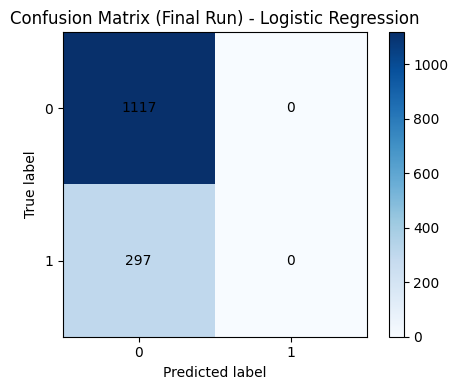

Sensitivity (Recall+): 0.0000 | Specificity: 1.0000
Precision (PPV): 0.0000 | NPV: 0.7900
FPR: 0.0000 | FNR: 1.0000 | F1: 0.0000
MCC: 0.0000 | Cohen's kappa: 0.0000 | Balanced Acc: 0.5000
Hamming loss: 0.2100 | Zero-One loss: 0.2100
Log Loss: 0.5155 | Brier score: 0.1663
Average Precision (PR-AUC): 0.2238


In [10]:
# Logistic Regression
for i in range(n_runs):
    print(f"\n--- Run {i+1}/{n_runs} ---")
    
    current_random_state = i 

    lr = LogisticRegression(max_iter=1000, random_state=current_random_state)
    lr.fit(data_train_x, data_train_y) 
    
    # Training accuracy
    y_train_pred = lr.predict(data_train_x)
    train_acc = accuracy_score(data_train_y, y_train_pred)
    results["Logistic Regression"]["train"].append(train_acc)
    
    # Test accuracy
    y_pred = lr.predict(data_test_x) 
    y_prob = lr.predict_proba(data_test_x)[:, 1] 
    test_acc = accuracy_score(data_test_y, y_pred)
    results["Logistic Regression"]["test"].append(test_acc)
    
    print(f"Logistic Regression - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    if i == n_runs - 1:  
        log_final_run_metrics("Logistic Regression", data_test_y, y_pred, y_prob, roc_data)


--- Run 1/5 ---
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.7900

--- Run 2/5 ---
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.7900

--- Run 2/5 ---
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.7900

--- Run 3/5 ---
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.7900

--- Run 3/5 ---
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.7900

--- Run 4/5 ---
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.7900

--- Run 4/5 ---
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.7900

--- Run 5/5 ---
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.7900

--- Run 5/5 ---
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.7900

=== Final-Run Metrics: Random Forest ===
Accuracy: 0.7900
Error rate (1-Acc): 0.2100
Classification Report:
              precision    recall  f1-score   support

           0     0.7900    1.0000    0.8827      1117
           1     0.0000    0.0000    0.0000       297

    accuracy    

/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

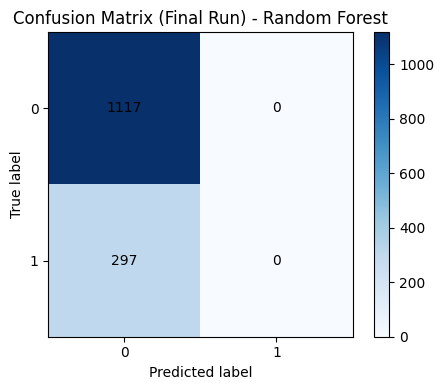

Sensitivity (Recall+): 0.0000 | Specificity: 1.0000
Precision (PPV): 0.0000 | NPV: 0.7900
FPR: 0.0000 | FNR: 1.0000 | F1: 0.0000
MCC: 0.0000 | Cohen's kappa: 0.0000 | Balanced Acc: 0.5000
Hamming loss: 0.2100 | Zero-One loss: 0.2100
Log Loss: 0.5322 | Brier score: 0.1720
Average Precision (PR-AUC): 0.1962


In [11]:
# Random Forest
for i in range(n_runs):
    print(f"\n--- Run {i+1}/{n_runs} ---")
    
    current_random_state = i 

    rf = RandomForestClassifier(n_estimators=100, random_state=current_random_state)
    rf.fit(data_train_x, data_train_y) 
    
    # Training accuracy
    y_train_pred = rf.predict(data_train_x)
    train_acc = accuracy_score(data_train_y, y_train_pred)
    results["Random Forest"]["train"].append(train_acc)
    
    # Test accuracy
    y_pred = rf.predict(data_test_x) 
    y_prob = rf.predict_proba(data_test_x)[:, 1] 
    test_acc = accuracy_score(data_test_y, y_pred)
    results["Random Forest"]["test"].append(test_acc)
    
    print(f"Random Forest - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    if i == n_runs - 1:  
        log_final_run_metrics("Random Forest", data_test_y, y_pred, y_prob, roc_data)


--- Run 1/5 ---
EBM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 2/5 ---
EBM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 2/5 ---
EBM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 3/5 ---
EBM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 3/5 ---
EBM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 4/5 ---
EBM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 4/5 ---
EBM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 5/5 ---
EBM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 5/5 ---
EBM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

=== Final-Run Metrics: EBM ===
Accuracy: 0.7900
Error rate (1-Acc): 0.2100
Classification Report:
              precision    recall  f1-score   support

           0     0.7900    1.0000    0.8827      1117
           1     0.0000    0.0000    0.0000       297

    accuracy                         0.7900      1414
   macro avg     0.3950    0.5000    0.4413      1414
weighted

/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

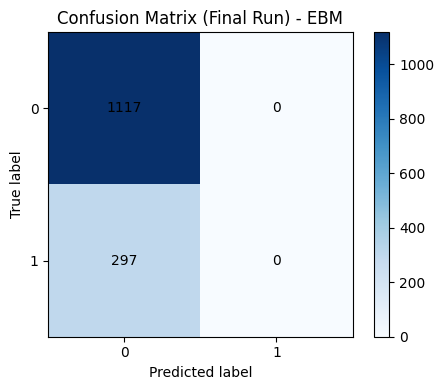

Sensitivity (Recall+): 0.0000 | Specificity: 1.0000
Precision (PPV): 0.0000 | NPV: 0.7900
FPR: 0.0000 | FNR: 1.0000 | F1: 0.0000
MCC: 0.0000 | Cohen's kappa: 0.0000 | Balanced Acc: 0.5000
Hamming loss: 0.2100 | Zero-One loss: 0.2100
Log Loss: 0.5159 | Brier score: 0.1665
Average Precision (PR-AUC): 0.2024


In [12]:
# Explainable Boosting Machine (EBM)
for i in range(n_runs):
    print(f"\n--- Run {i+1}/{n_runs} ---")
    
    current_random_state = i 

    ebm = ExplainableBoostingClassifier(random_state=current_random_state)
    ebm.fit(data_train_x, data_train_y) 
    
    # Training accuracy
    y_train_pred = ebm.predict(data_train_x)
    train_acc = accuracy_score(data_train_y, y_train_pred)
    results["EBM"]["train"].append(train_acc)
    
    # Test accuracy
    y_pred = ebm.predict(data_test_x) 
    y_prob = ebm.predict_proba(data_test_x)[:, 1]
    test_acc = accuracy_score(data_test_y, y_pred)
    results["EBM"]["test"].append(test_acc)
    
    print(f"EBM - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    if i == n_runs - 1:  
        log_final_run_metrics("EBM", data_test_y, y_pred, y_prob, roc_data)


--- Run 1/5 ---
SVM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 2/5 ---
SVM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 2/5 ---
SVM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 3/5 ---
SVM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 3/5 ---
SVM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 4/5 ---
SVM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 4/5 ---
SVM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 5/5 ---
SVM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

--- Run 5/5 ---
SVM - Train Accuracy: 0.7987, Test Accuracy: 0.7900

=== Final-Run Metrics: SVM ===
Accuracy: 0.7900
Error rate (1-Acc): 0.2100
Classification Report:
              precision    recall  f1-score   support

           0     0.7900    1.0000    0.8827      1117
           1     0.0000    0.0000    0.0000       297

    accuracy                         0.7900      1414
   macro avg     0.3950    0.5000    0.4413      1414
weighted

/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

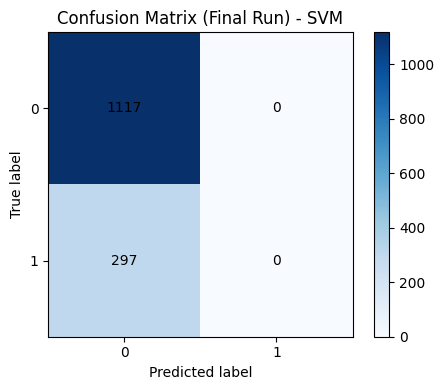

Sensitivity (Recall+): 0.0000 | Specificity: 1.0000
Precision (PPV): 0.0000 | NPV: 0.7900
FPR: 0.0000 | FNR: 1.0000 | F1: 0.0000
MCC: 0.0000 | Cohen's kappa: 0.0000 | Balanced Acc: 0.5000
Hamming loss: 0.2100 | Zero-One loss: 0.2100
Log Loss: 0.5146 | Brier score: 0.1661
Average Precision (PR-AUC): 0.2044


In [13]:
# Support Vector Machine (SVM)
for i in range(n_runs):
    print(f"\n--- Run {i+1}/{n_runs} ---")
    
    current_random_state = i 

    svm = SVC(kernel='rbf', probability=True, random_state=current_random_state)  
    svm.fit(data_train_x, data_train_y) 
    
    # Training accuracy
    y_train_pred = svm.predict(data_train_x)
    train_acc = accuracy_score(data_train_y, y_train_pred)
    results["SVM"]["train"].append(train_acc)
    
    # Test accuracy
    y_pred = svm.predict(data_test_x) 
    y_prob = svm.predict_proba(data_test_x)[:, 1]
    test_acc = accuracy_score(data_test_y, y_pred)
    results["SVM"]["test"].append(test_acc)
    
    print(f"SVM - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    if i == n_runs - 1:  
        log_final_run_metrics("SVM", data_test_y, y_pred, y_prob, roc_data)


--- Run 1/5 ---
XGBoost - Train Accuracy: 0.9936, Test Accuracy: 0.7730

--- Run 2/5 ---
XGBoost - Train Accuracy: 0.9936, Test Accuracy: 0.7730

--- Run 2/5 ---


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [16:36:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [16:36:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Train Accuracy: 0.9936, Test Accuracy: 0.7730

--- Run 3/5 ---
XGBoost - Train Accuracy: 0.9936, Test Accuracy: 0.7730

--- Run 4/5 ---
XGBoost - Train Accuracy: 0.9936, Test Accuracy: 0.7730

--- Run 4/5 ---


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [16:36:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [16:36:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Train Accuracy: 0.9936, Test Accuracy: 0.7730

--- Run 5/5 ---
XGBoost - Train Accuracy: 0.9936, Test Accuracy: 0.7730

=== Final-Run Metrics: XGBoost ===
Accuracy: 0.7730
Error rate (1-Acc): 0.2270
Classification Report:
              precision    recall  f1-score   support

           0     0.7918    0.9669    0.8706      1117
           1     0.2600    0.0438    0.0749       297

    accuracy                         0.7730      1414
   macro avg     0.5259    0.5053    0.4728      1414
weighted avg     0.6801    0.7730    0.7035      1414

Confusion Matrix [rows=true, cols=pred]:
[[1080   37]
 [ 284   13]]
XGBoost - Train Accuracy: 0.9936, Test Accuracy: 0.7730

=== Final-Run Metrics: XGBoost ===
Accuracy: 0.7730
Error rate (1-Acc): 0.2270
Classification Report:
              precision    recall  f1-score   support

           0     0.7918    0.9669    0.8706      1117
           1     0.2600    0.0438    0.0749       297

    accuracy                         0.7730      1

/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [16:36:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


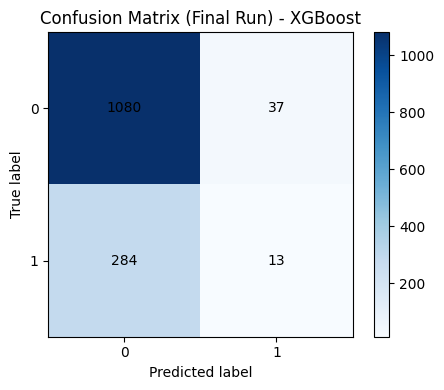

Sensitivity (Recall+): 0.0438 | Specificity: 0.9669
Precision (PPV): 0.2600 | NPV: 0.7918
FPR: 0.0331 | FNR: 0.9562 | F1: 0.0749
MCC: 0.0235 | Cohen's kappa: 0.0153 | Balanced Acc: 0.5053
Hamming loss: 0.2270 | Zero-One loss: 0.2270
Log Loss: 0.6278 | Brier score: 0.1870
Average Precision (PR-AUC): 0.2258


In [14]:
# XGBoost
for i in range(n_runs):
    print(f"\n--- Run {i+1}/{n_runs} ---")
    
    current_random_state = i 

    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=current_random_state)
    xgb.fit(data_train_x, data_train_y)
    
    # Training accuracy
    y_train_pred = xgb.predict(data_train_x)
    train_acc = accuracy_score(data_train_y, y_train_pred)
    results["XGBoost"]["train"].append(train_acc)
    
    # Test accuracy
    y_pred = xgb.predict(data_test_x)
    y_prob = xgb.predict_proba(data_test_x)[:, 1]
    test_acc = accuracy_score(data_test_y, y_pred)
    results["XGBoost"]["test"].append(test_acc)
    
    print(f"XGBoost - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    if i == n_runs - 1:  
        log_final_run_metrics("XGBoost", data_test_y, y_pred, y_prob, roc_data)


--- Run 1/5 ---


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
DNN - Train Accuracy: 0.8192, Test Accuracy: 0.7786

--- Run 2/5 ---
DNN - Train Accuracy: 0.8192, Test Accuracy: 0.7786

--- Run 2/5 ---


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
DNN - Train Accuracy: 0.8222, Test Accuracy: 0.7666

--- Run 3/5 ---
DNN - Train Accuracy: 0.8222, Test Accuracy: 0.7666

--- Run 3/5 ---


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
DNN - Train Accuracy: 0.8206, Test Accuracy: 0.7716

--- Run 4/5 ---
DNN - Train Accuracy: 0.8206, Test Accuracy: 0.7716

--- Run 4/5 ---


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
DNN - Train Accuracy: 0.8181, Test Accuracy: 0.7765

--- Run 5/5 ---
DNN - Train Accuracy: 0.8181, Test Accuracy: 0.7765

--- Run 5/5 ---


/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
DNN - Train Accuracy: 0.8082, Test Accuracy: 0.7829

=== Final-Run Metrics: DNN ===
Accuracy: 0.7829
Error rate (1-Acc): 0.2171
Classification Report:
              precision    recall  f1-score   support

           0     0.7889    0.9902    0.8781      1117
           1     0.0833    0.0034    0.0065       297

    accuracy                         0.7829      1414
   macro avg     0.4361    0.4968    0.4423      1414
weighted avg     0.6407    0.7829    0.6950      1414

Confusion Matrix [rows=true, cols=pred]:
[[1106   11]
 [ 296    1]]
DNN - Train Accuracy: 0.8082, Test Accuracy: 0.7829

=== Final-Run Metrics: DNN ===
Accuracy: 0.7829
Error rate (1-Acc): 0.2171
Classification Report:
              precision    recall  f1-score   support

           0     0.7889    0.9902    0.8781      1117
           1     0.0833   

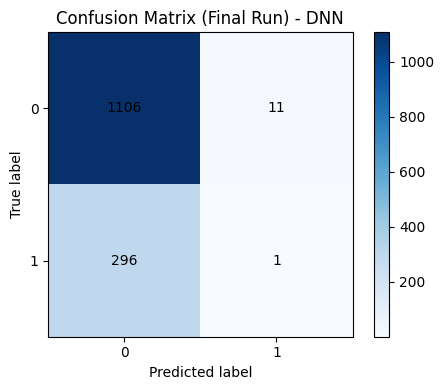

Sensitivity (Recall+): 0.0034 | Specificity: 0.9902
Precision (PPV): 0.0833 | NPV: 0.7889
FPR: 0.0098 | FNR: 0.9966 | F1: 0.0065
MCC: -0.0288 | Cohen's kappa: -0.0100 | Balanced Acc: 0.4968
Hamming loss: 0.2171 | Zero-One loss: 0.2171
Log Loss: 0.5836 | Brier score: 0.1799
Average Precision (PR-AUC): 0.2073


In [15]:
# Deep Neural Network (DNN)
for i in range(n_runs):
    print(f"\n--- Run {i+1}/{n_runs} ---")
    
    current_random_state = i 

    dnn = Sequential()
    dnn.add(Dense(128, input_dim=data_train_x.shape[1], activation='relu'))
    dnn.add(BatchNormalization())
    dnn.add(Dropout(0.3))
    dnn.add(Dense(64, activation='relu'))
    dnn.add(Dense(1, activation='sigmoid'))

    dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    dnn.fit(data_train_x, data_train_y, epochs=20, batch_size=32, verbose=0)

    # Training accuracy
    y_train_prob = dnn.predict(data_train_x).flatten()
    y_train_pred = (y_train_prob > 0.5).astype(int)
    train_acc = accuracy_score(data_train_y, y_train_pred)
    results["DNN"]["train"].append(train_acc)
    
    # Test accuracy
    y_prob = dnn.predict(data_test_x).flatten()
    y_pred = (y_prob > 0.5).astype(int)
    test_acc = accuracy_score(data_test_y, y_pred)
    results["DNN"]["test"].append(test_acc)
    
    print(f"DNN - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    if i == n_runs - 1:  
        log_final_run_metrics("DNN", data_test_y, y_pred, y_prob, roc_data)

In [16]:
print(f"\n{'='*20} [ สรุปผล Accuracy จาก {n_runs} Runs ] {'='*20}")
for model, scores in results.items():
    print(f"\n{model}:")
    print(f"Training: {['{:.4f}'.format(a) for a in scores['train']]}")
    print(f"Testing:  {['{:.4f}'.format(a) for a in scores['test']]}")


==================== [ สรุปผล Accuracy จาก 5 Runs ] ====================

Logistic Regression:
Training: ['0.7987', '0.7987', '0.7987', '0.7987', '0.7987']
Testing:  ['0.7900', '0.7900', '0.7900', '0.7900', '0.7900']

Random Forest:
Training: ['1.0000', '1.0000', '1.0000', '1.0000', '1.0000']
Testing:  ['0.7900', '0.7900', '0.7900', '0.7900', '0.7900']

EBM:
Training: ['0.7987', '0.7987', '0.7987', '0.7987', '0.7987']
Testing:  ['0.7900', '0.7900', '0.7900', '0.7900', '0.7900']

SVM:
Training: ['0.7987', '0.7987', '0.7987', '0.7987', '0.7987']
Testing:  ['0.7900', '0.7900', '0.7900', '0.7900', '0.7900']

XGBoost:
Training: ['0.9936', '0.9936', '0.9936', '0.9936', '0.9936']
Testing:  ['0.7730', '0.7730', '0.7730', '0.7730', '0.7730']

DNN:
Training: ['0.8192', '0.8222', '0.8206', '0.8181', '0.8082']
Testing:  ['0.7786', '0.7666', '0.7716', '0.7765', '0.7829']


In [17]:
summary = {}
for model_name, scores in results.items():
    summary[model_name] = {
        'Mean Train Acc': np.mean(scores['train']),
        'Std Train Acc': np.std(scores['train']),
        'Min Train Acc': np.min(scores['train']),
        'Max Train Acc': np.max(scores['train']),
        'Mean Test Acc': np.mean(scores['test']),
        'Std Test Acc': np.std(scores['test']),
        'Min Test Acc': np.min(scores['test']),
        'Max Test Acc': np.max(scores['test'])
    }

summary_df = pd.DataFrame(summary).T
print("\nModel Performance Summary:")
print(summary_df)


Model Performance Summary:
                     Mean Train Acc  Std Train Acc  Min Train Acc  \
Logistic Regression        0.798691       0.000000       0.798691   
Random Forest              1.000000       0.000000       1.000000   
EBM                        0.798691       0.000000       0.798691   
SVM                        0.798691       0.000000       0.798691   
XGBoost                    0.993632       0.000000       0.993632   
DNN                        0.817690       0.004917       0.808243   

                     Max Train Acc  Mean Test Acc  Std Test Acc  Min Test Acc  \
Logistic Regression       0.798691       0.789958      0.000000      0.789958   
Random Forest             1.000000       0.789958      0.000000      0.789958   
EBM                       0.798691       0.789958      0.000000      0.789958   
SVM                       0.798691       0.789958      0.000000      0.789958   
XGBoost                   0.993632       0.772984      0.000000      0.772984   
DN

/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tanananyathongkum/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


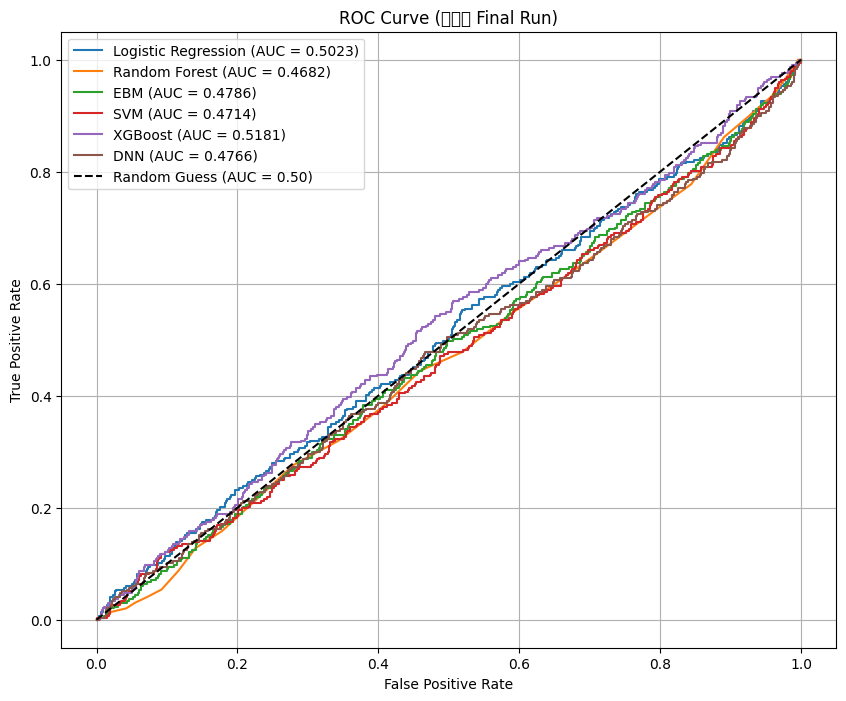

In [18]:
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')
plt.title('ROC Curve (จาก Final Run)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()